# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [1]:
import pandas as pd
# df = pd.read_csv('train.csv')
# df.describe()

def read_data(path):
    df = pd.read_csv(path)
    return df

path = 'train.csv'
df = read_data(path)
# print(df)
df.describe()
# print(df.iloc[0])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [140]:
def num_nans(df):
    # shape = df.shape
    # num = 0
    # # print(list(df))
    # # print(shape[0])
    # for i in range(shape[0]): # 0....891 去掉了列名，即最上面一行
    #     for j in range(shape[1]): # 12
    #         # if i == 0 and j == 0:
    #         #     print(df.iloc[i,j]) 
    #         if df.iloc[i, j] == 0:
    #             num += 1
    #             break
    #         continue
    # empty不是0，是指空
    return df.isna().any(axis = 1).sum()
    

# 891 x 12
num_nans(df)
print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [143]:
# import numpy as np

# def drop_na(df):
#     shape = df.shape
#     columns = list(df) # ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
#     # print(len(columns))
#     # nan = np.nan
#     for col in range(shape[1]): # 0,1,2,3...11
#         num = 0
#         for row in range(shape[0]): # 0....891
#             if num > 200 : # more than 200 NaN
#                 df.drop([columns[col]], axis = 1) #, inplace = True) # drop this col in the origin DataFrame
#                 break
#             if pd.isna(df.iloc[row, col]):
#                  num += 1
#     return df

def drop_na(df):
    columns = list(df) # ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
    for col in columns:
        # print(df[col].notna().sum()) # 非空
        if df[col].notna().sum() < len(df) - 200:
            df.drop([col], axis = 1, inplace = True)
    return df

df = pd.read_csv('train.csv')
df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [5]:
def to_numerical(df):
    # for sex in df['Sex']:  
    #     if sex == 'male':
    #         df['Sex'].replace('male', 0) # , inplace = True)
    #     if sex == 'female':
    #         df['Sex'].replace('female', 1) # , inplace = True)
    df['Sex'].replace('male', 0, inplace = True)
    df['Sex'].replace('female', 1, inplace = True)
    return df['Sex']

df = pd.read_csv('train.csv')
print(df['Sex'])
df['Sex'] = to_numerical(df)
df.head()
print(df['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [6]:
def extract_names(df):
    Name = df['Name']
    return # your code here


df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()
print(df['Name'])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [7]:
def replace_with_mean(df):
    average = df['Age'].mean()
    df['Age'].fillna(average, inplace = True) # 填充空值
    return df['Age']

df = pd.read_csv('train.csv')
print(df['Age'])
df['Age'] = replace_with_mean(df)
df.head()
print(df['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

0    549
1    342
Name: Survived, dtype: int64


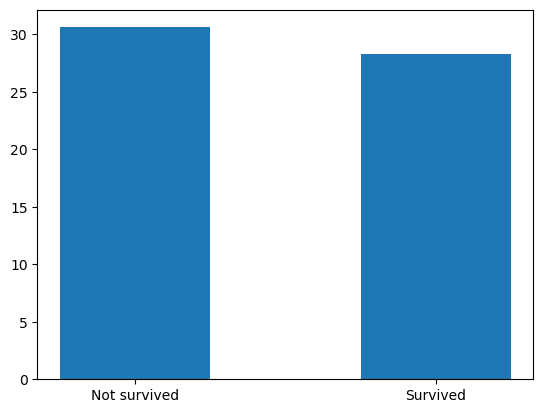

In [8]:
# survived_age, die_age = 0, 0
# for col in df['Survived']:
#     if col == 1:
#         num += 1
#         survived_age += survived_age
#     else:
#         die_age += die_age
#         die += 1

import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

num = df['Survived'].value_counts() # value_counts() 用来查看数据表中，指定列里有多少个不同的数据值，并计算每个不同值有在该列中的个数，同时还能根据需要进行排序。
print(num)

die_age = df.loc[df['Survived'] == 0]['Age'].mean()
survived_age = df[df['Survived'] == 1]['Age'].mean()
# print(die_age, survived_age,)

data = [die_age, survived_age]
labels = ['Not survived', 'Survived']
plt.bar(range(len(data)), data, width = 0.5, tick_label = labels)
plt.show()

Comment: As can be seen from the graph, the average age of those who did not survive was a bit older. Average age of not survived is older than 30 but the survived is younger than 30, about 28.



-> your answer here 

Comment: As can be seen from the graph, the average age of those who did not survive was a bit older. Average age of not survived is older than 30 but the survived is younger than 30, about 28.



h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

male      577
female    314
Name: Sex, dtype: int64
female    233
male      109
Name: Sex, dtype: int64
0.18890814558058924


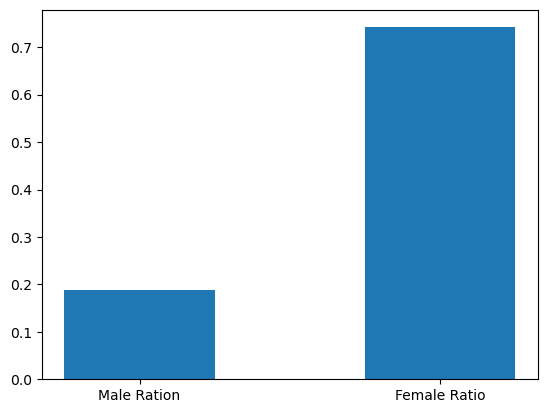

In [129]:
# your code here

df = pd.read_csv('train.csv')

sex = df['Sex'].value_counts() # male: 577, female: 314
#print(sex)
survived = df[df['Survived'] == 1]['Sex'].value_counts()
#print(survived)

male_ratio = survived['male'] / sex['male']
female_ratio = survived['female'] / sex['female']
ratio = [male_ratio, female_ratio]
#print(male_ratio)
labels = ['Male Ration', 'Female Ratio']
plt.bar(range(len(ratio)), ratio, width = 0.5, tick_label = labels)
plt.show()

-> your answer here

Comment: More women survive than men. There are nearly twice as many surviving females as surviving males.

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

In [132]:
# your code here
df = pd.read_csv('train.csv')
#survived = df[df['Survived'] == 1]['Pclass'].value_counts()
print(df['Name'])
df1 = df['Name'].str.split(',')
print(df1)
title = str(df1[0]).split('.')
print(title)
# plt.bar(range(len(survived)), survived, width = 0.5)
# plt.show()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object
0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                 

-> your answer here

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

48.39540760233917
22.117886885245877


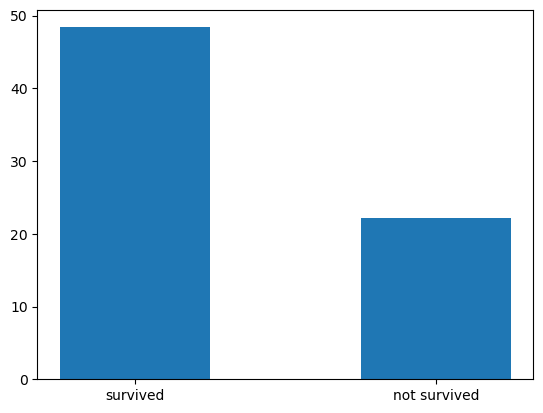

In [10]:
# your code here
df = pd.read_csv('train.csv')
survived_fare = df[df['Survived'] == 1]['Fare'].mean()
print(survived_fare)
die_fare = df[df['Survived'] == 0]['Fare'].mean()
print(die_fare)
data = [survived_fare, die_fare]
labels = ['survived', 'not survived']
plt.bar(range(len(data)), data, width = 0.5, tick_label = labels)
plt.show()

-> your answer here

Comment: The average fare for those who didn't survive was more than half that of those who survived. It seems like that those who bought cheap tickets had lower survival rates.

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 549, dtype: float64


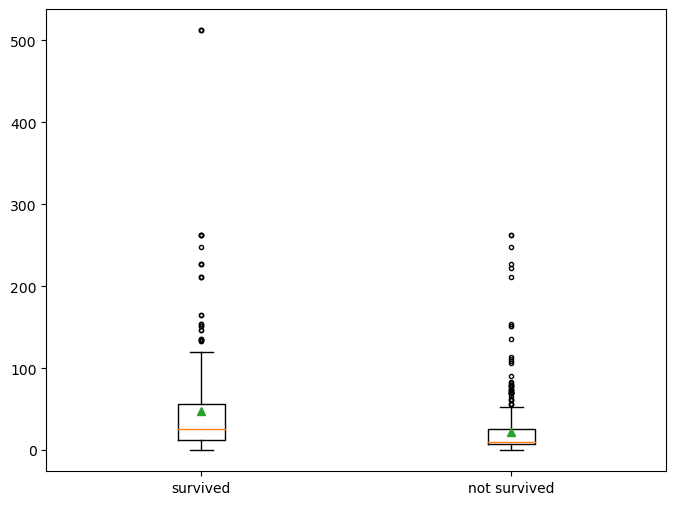

In [11]:
# your code here
df = pd.read_csv('train.csv')
survived_fare = df[df['Survived'] == 1]['Fare']
die_fare = df[df['Survived'] == 0]['Fare']
print(die_fare)
box1, box2 = survived_fare, die_fare
labels = ['survived', 'not survived']

plt.figure(figsize=(8,6)) # 设置画布的尺寸
plt.boxplot([box1, box2], labels = labels, showmeans=True, sym = '.')
plt.show()

-> your answer here

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [63]:
# your code here

def modify_fare(df):
    mean = df['Fare'].mean()
    std = df['Fare'].std()
    # print(std, mean)
    # for i in range(len(df['Fare'])):
    #     fare = df['Fare'][i]
    #     # print("time:",i, fare)
    #     new_fare = (fare - mean) / std
    #     # print(i, new_fare)
    #     df['Fare'].replace(fare, new_fare, inplace = True)
    return (df['Fare'] - mean) / std

df = pd.read_csv('train.csv')
df['Fare'] = modify_fare(df)
# df.head()
print(df['Fare'])


0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891, dtype: float64


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [13]:
# from pandas.api.types import is_number



df = pd.read_csv('train.csv')
print(df.dtypes)

columns = list(df) # ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
for col in columns:
    if df[col].dtypes == object:# or df[col].dtype == float):
        df.drop(col, axis = 1, inplace = True)

print("\n")
print(df.dtypes)
print(list(df))





PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


m) Ignoring passenger ID, write a function that returns the names of the N most similar pairs of passengers using the euclidean distance? - (15 points)

In [14]:
def N_most_similar_pairs(df, N):
    return # < your code here >

print("The 3 most similar passengers are: " + str(N_most_similar_pairs(df, 3)))

The 3 most similar passengers are: None


## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [138]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        #print('tt')
        return json.loads(response.content.decode('utf-8'))

    return response

python = get("Python")
# print(python)
data_science = get("Data Science")
data_analytics = get("Data Analysis")
machine_learning = get("Machine Learning")
deep_learning = get("Deep Learning")

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [139]:
# your code here

PY_df = pd.json_normalize(python['items'])
# print(PY_df)
PY_df.to_csv("python.csv")

DS_df = pd.json_normalize(data_science['items'])
DS_df.to_csv("Data Science.csv")

DA_df = pd.json_normalize(data_analytics['items'])
DA_df.to_csv("Data Analytics.csv")

ML_df = pd.json_normalize(machine_learning['items'])
ML_df.to_csv("Machine Learning.csv")

DL_df = pd.json_normalize(deep_learning['items'])
DL_df.to_csv("Deep Learning.csv")

c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [76]:
# your code here

PY_df = pd.json_normalize(python['items'])
# print(PY_df)
PY_df.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace = True)
# print(PY_df)

DS_df = pd.json_normalize(data_science['items'])
DS_df.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace = True)

DA_df = pd.json_normalize(data_analytics['items'])
DA_df.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace = True)

ML_df = pd.json_normalize(machine_learning['items'])
ML_df.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace = True)

DL_df = pd.json_normalize(deep_learning['items'])
DL_df.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace = True)


d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [82]:
# your code here

PY_df['Topic'] = "Python"
DS_df['Topic'] = "Data Science"
DA_df['Topic'] = "Data Analysis"
ML_df['Topic'] = "Machine Learning"
DL_df['Topic'] = "Deep Learning"

# print(PY_df)


           kind            id         etag  \
0  books#volume  LqmaDwAAQBAJ  Wv7LuTTrKMA   
1  books#volume  Chr1NDlUcI8C  5QGVJuRLa6c   
2  books#volume  bTUFCAAAQBAJ  M3GhSu3FpsY   
3  books#volume  aJQILlLxRmAC  u/yzRuRX0p0   
4  books#volume  RQ6xDwAAQBAJ  h+k0FZwGppQ   
5  books#volume  0enPvgEACAAJ  jkq89uYmmXw   
6  books#volume  H9emM_LGFDEC  8YLj+V5B5+M   
7  books#volume  2tAwEAAAQBAJ  5gUvvp8/1lU   
8  books#volume  b1v6DwAAQBAJ  mtdFO4Fh+/E   
9  books#volume  2XliiK7FKoEC  L/Z0j/J9kBE   

                                            selfLink  \
0  https://www.googleapis.com/books/v1/volumes/Lq...   
1  https://www.googleapis.com/books/v1/volumes/Ch...   
2  https://www.googleapis.com/books/v1/volumes/bT...   
3  https://www.googleapis.com/books/v1/volumes/aJ...   
4  https://www.googleapis.com/books/v1/volumes/RQ...   
5  https://www.googleapis.com/books/v1/volumes/0e...   
6  https://www.googleapis.com/books/v1/volumes/H9...   
7  https://www.googleapis.com/books/v1/volume

e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [88]:
# your code here

def Data_row(df):
    data = df.loc[df['Title'].str.contains("Data")] # 获取列名中包含“指定字符”这个字符串的所有行
    return data


# test cases
print(DS_df['Title'])
data = Data_row(DS_df)
print(data)

print(PY_df['Title'])
data1 = Data_row(PY_df)
print(data1)




0                                   Python For Dummies
1                           Python Essential Reference
2                                     Effective Python
3                                   Python Programming
4    Automate the Boring Stuff with Python, 2nd Edi...
5                                      The Python Book
6                              Programming in Python 3
7                            Expert Python Programming
8                                       Serious Python
9                                       Violent Python
Name: Title, dtype: object
Empty DataFrame
Columns: [kind, id, etag, selfLink, Title, Authors, volumeInfo.publisher, volumeInfo.publishedDate, volumeInfo.description, volumeInfo.industryIdentifiers, volumeInfo.readingModes.text, volumeInfo.readingModes.image, volumeInfo.pageCount, volumeInfo.printType, volumeInfo.categories, volumeInfo.averageRating, volumeInfo.ratingsCount, volumeInfo.maturityRating, volumeInfo.allowAnonLogging, volumeInfo.conte

f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [89]:
# your code here

print(PY_df['Authors'])

0        [Stef Maruch, Aahz Maruch]
1                [David M. Beazley]
2                   [Brett Slatkin]
3                   [John M. Zelle]
4                     [Al Sweigart]
5              [Rob Mastrodomenico]
6                [Mark Summerfield]
7    [Michał Jaworski, Tarek Ziadé]
8                   [Julien Danjou]
9                     [TJ O'Connor]
Name: Authors, dtype: object
